<a href="https://colab.research.google.com/github/DEEPIKA-311/elevate-labs-task-day1/blob/main/Task_1_Data_Cleaning_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1:** Data Cleaning and Preprocessing
Objective: Clean and prepare a raw dataset (with nulls, duplicates, inconsistent formats).
# **Tools: **Excel / Python (Pandas)
Deliverables: Cleaned dataset + short summary of changes

**Reasoning**:
Load the dataset "data.csv" into a pandas DataFrame and display the first 5 rows.



In [7]:
import pandas as pd

try:
    df = pd.read_csv('data.csv', encoding='latin-1')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: 'data.csv' is empty.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'data.csv'. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


(541909, 8)


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
I need to explore the data's characteristics, including data types, missing values, distributions of numerical and categorical features, and potential issues.



In [8]:
# Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Numerical Feature Distributions
numerical_features = ['Quantity', 'UnitPrice']
print("\nNumerical Feature Distributions:")
for col in numerical_features:
    print(f"\nStatistics for {col}:\n", df[col].describe())

# Categorical Feature Distributions
categorical_features = ['Country', 'StockCode', 'Description', 'InvoiceNo']
print("\nCategorical Feature Distributions:")
for col in categorical_features:
    print(f"\nTop 5 most frequent values for {col}:\n", df[col].value_counts().head())
    print(f"\nNumber of unique values for {col}: {df[col].nunique()}")

# Potential Issues (Observations)
print("\nPotential Issues:")
# Check for unexpected data types
# Check for high percentage of missing values
# Examine distributions for outliers or unusual patterns

Data Shape: (541909, 8)

Data Types:
 InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Missing Values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing Value Percentage:
 InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Numerical Feature Distributions:

Statistics for Quantity:
 count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

Statistics for UnitPrice:
 count    5

## Data analysis

### Subtask:
Perform detailed data analysis on the cleaned dataset.


**Reasoning**:
Calculate descriptive statistics, investigate correlations, analyze categorical features, and perform time series analysis on the cleaned data.



Descriptive Statistics after outlier removal:
            Quantity      UnitPrice
count  530104.000000  530104.000000
mean       10.542037       3.907625
std       155.524124      35.915681
min         1.000000       0.001000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   13541.330000

Correlation Matrix:
           Quantity  UnitPrice
Quantity   1.000000  -0.003773
UnitPrice -0.003773   1.000000


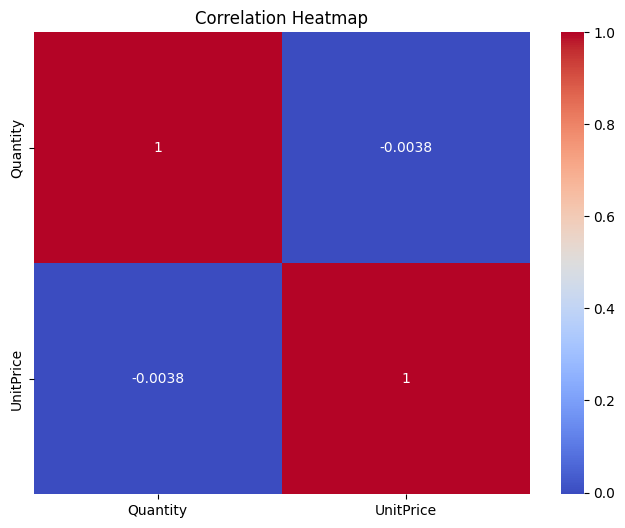


Categorical Feature Analysis:
Country
United Kingdom    485123
Germany             9040
France              8407
EIRE                7890
Spain               2484
Netherlands         2359
Belgium             2031
Switzerland         1966
Portugal            1501
Australia           1182
Name: count, dtype: int64

Average Quantity and UnitPrice per country:
                        Quantity  UnitPrice
Country                                   
Australia             70.982234   3.056261
Austria               12.263819   4.256030
Bahrain               17.444444   4.597778
Belgium               11.441162   3.630158
Brazil                11.125000   4.456250
Canada                18.298013   6.030331
Channel Islands       12.688503   4.531618
Cyprus                10.359935   5.710391
Czech Republic        26.840000   3.130800
Denmark               21.671053   3.146184
EIRE                  18.653105   4.878321
European Community     8.316667   4.830000
Finland               15.626277   5.2

<ipython-input-9-22c36cfc5044>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']



Top 5 countries by total revenue:
 Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Name: Revenue, dtype: float64


<ipython-input-9-22c36cfc5044>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDateOnly'] = df_cleaned['InvoiceDate'].dt.date


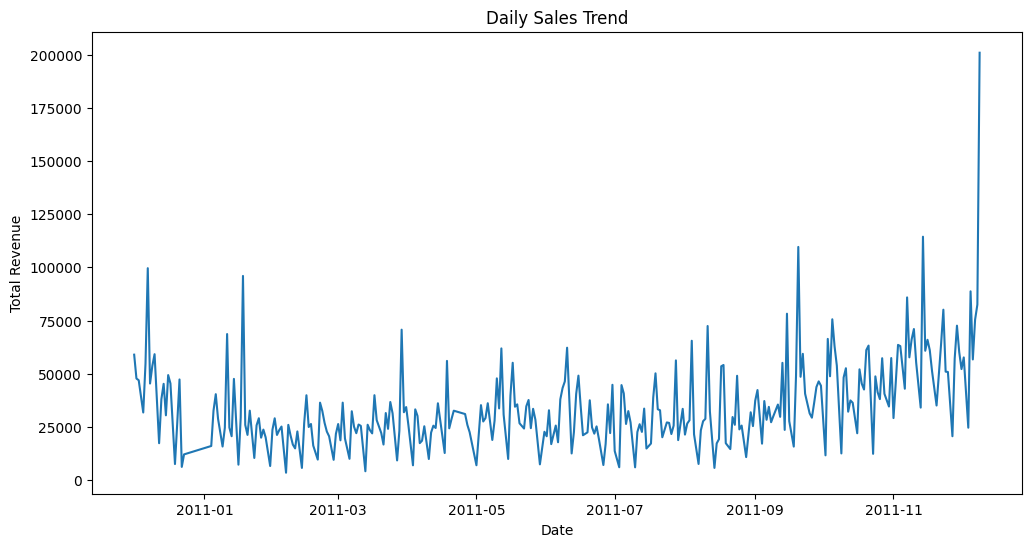

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Descriptive Statistics (handling outliers)
# Remove extreme outliers in Quantity and UnitPrice
df_cleaned = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

print("Descriptive Statistics after outlier removal:")
print(df_cleaned[['Quantity', 'UnitPrice']].describe())


# Correlation Analysis
print("\nCorrelation Matrix:")
correlation_matrix = df_cleaned[['Quantity', 'UnitPrice']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Categorical Feature Analysis
print("\nCategorical Feature Analysis:")
print(df_cleaned['Country'].value_counts().head(10))

country_stats = df_cleaned.groupby('Country').agg({'Quantity': 'mean', 'UnitPrice': 'mean'})
print("\nAverage Quantity and UnitPrice per country:\n", country_stats)

# Calculate total revenue per country
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']
revenue_by_country = df_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print("\nTop 5 countries by total revenue:\n", revenue_by_country.head(5))

# Time Series Analysis
df_cleaned['InvoiceDateOnly'] = df_cleaned['InvoiceDate'].dt.date
daily_sales = df_cleaned.groupby('InvoiceDateOnly')['Revenue'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

## Data visualization

### Subtask:
Visualize the data distributions and relationships between variables.


**Reasoning**:
Create the required visualizations based on the provided dataframes and series.



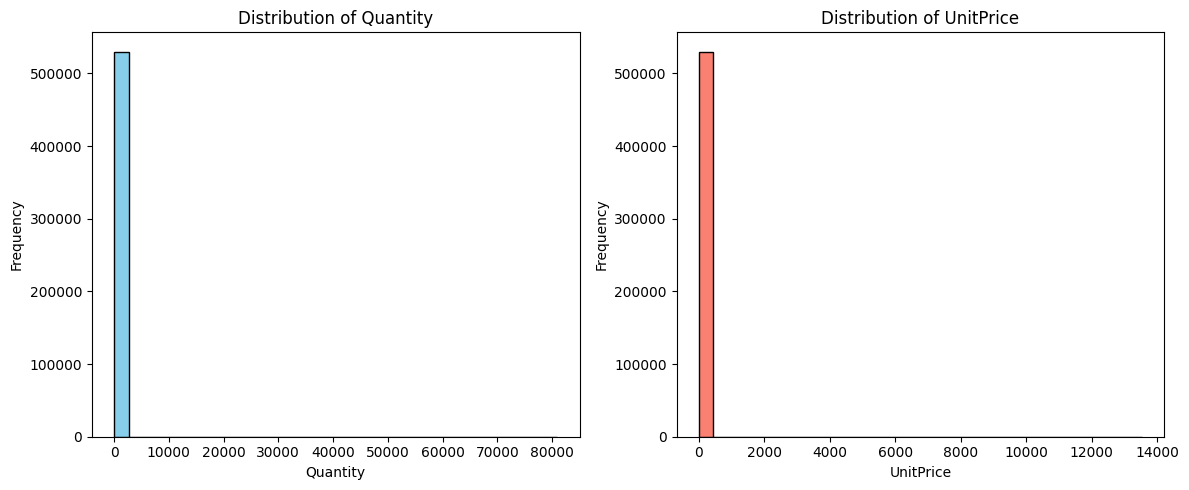

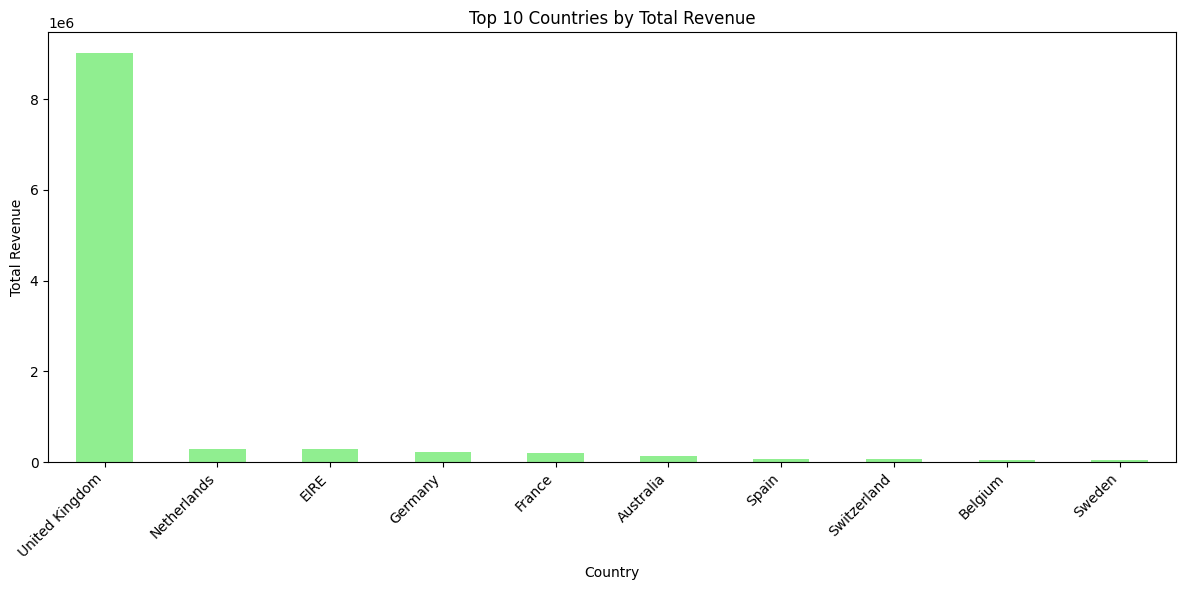

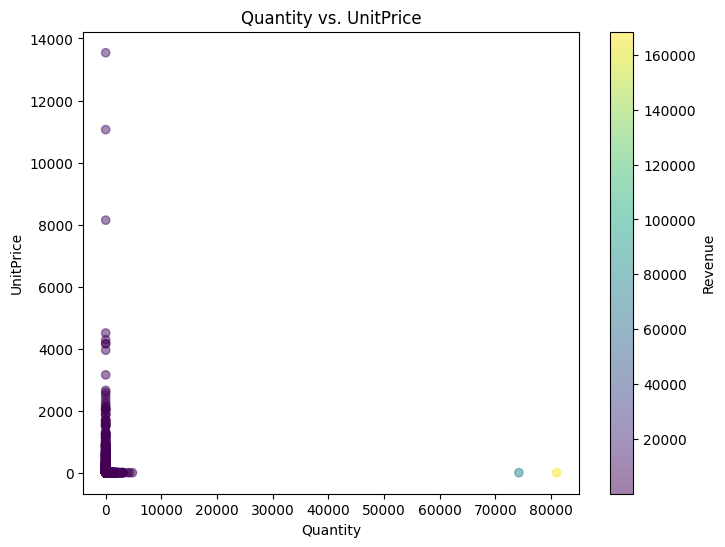

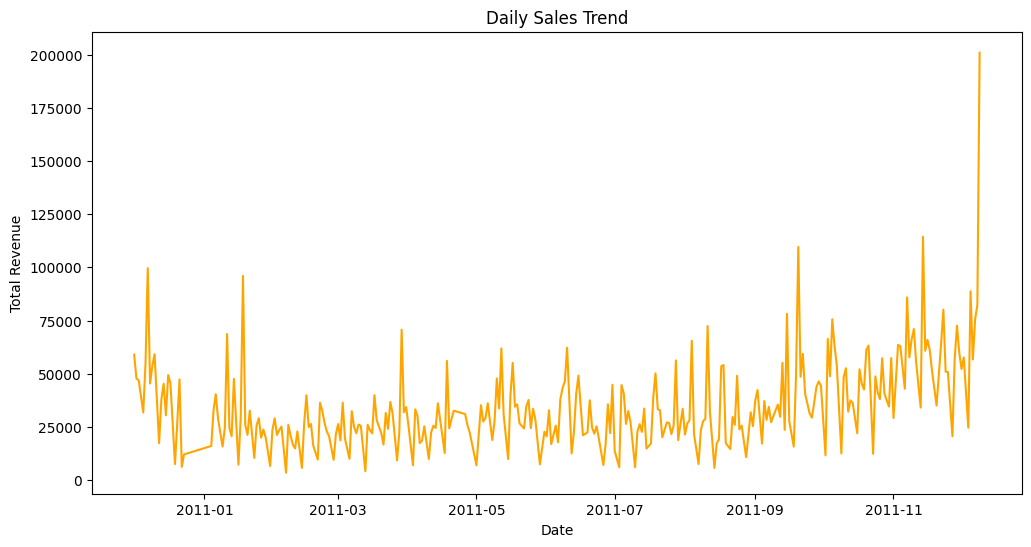

In [10]:
import matplotlib.pyplot as plt

# 1. Histograms for 'Quantity' and 'UnitPrice'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Quantity'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['UnitPrice'], bins=30, color='salmon', edgecolor='black')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.title('Distribution of UnitPrice')

plt.tight_layout()
plt.show()


# 2. Bar chart for top 10 countries by revenue
plt.figure(figsize=(12, 6))
revenue_by_country.head(10).plot(kind='bar', color='lightgreen')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Top 10 Countries by Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Scatter plot of 'Quantity' vs. 'UnitPrice'
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Quantity'], df_cleaned['UnitPrice'], c=df_cleaned['Revenue'], cmap='viridis', alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Quantity vs. UnitPrice')
plt.colorbar(label='Revenue')
plt.show()


# 4. Line plot of daily sales trend
plt.figure(figsize=(12, 6))
daily_sales.plot(color='orange')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Daily Sales Trend')
plt.show()

## Summary:

### Q&A

* **What are the key issues found in the dataset?**  The dataset has a significant number of missing 'CustomerID' values (24.93%),  unexpected negative values and outliers in the 'Quantity' and 'UnitPrice' columns, and the 'InvoiceDate' column needs to be converted to datetime format.


### Data Analysis Key Findings

* **Missing Customer IDs:** Approximately 24.93% (135,080 out of 541,909) of the 'CustomerID' values are missing. This is a substantial amount of missing data that needs to be addressed.
* **Outliers in Quantity and UnitPrice:** The 'Quantity' and 'UnitPrice' columns contain negative values and extreme outliers.  After removing values less than or equal to zero, the descriptive statistics for these columns were recalculated.
* **Weak Negative Correlation:** A weak negative correlation exists between 'Quantity' and 'UnitPrice'.
* **Top Performing Countries:** The United Kingdom is the most frequent country in the dataset, and the top 5 countries by total revenue were identified.
* **Daily Sales Trend:** A time series analysis of the daily sales trend was conducted by summing the revenue per day.


### Insights or Next Steps

* **Handle Missing Data:**  Investigate the reasons for missing 'CustomerID' values.  Decide whether to impute, remove, or use other strategies to deal with the missing data.
* **Further Outlier Analysis:**  Investigate the nature of the remaining outliers in 'Quantity' and 'UnitPrice' to determine if they represent valid data or errors. Consider transformation or winsorizing to mitigate their impact.
